## Adeeb Khoja - Nour Alhuda Mawas - Muaaz Deyab

# TF-IDF & Cosine Similarity Search

In [7]:
# Defining Documents Example
document_1 = "I love watching movies when it's cold outside"
document_2 = "Toy Story is the best animation movie ever, I love it!"
document_3 = "Watching horror movies alone at night is really scary"
document_4 = "He loves to watch films filled with suspense and unexpected plot twists"
document_5 = "My mom loves to watch movies. My dad hates movie theaters. My brothers like any kind of movie. And I haven't watched a single movie since I got into college"
documents = [document_1, document_2, document_3, document_4, document_5]

## Preprocessing


## Term Document Matrix
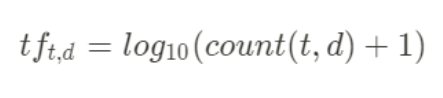
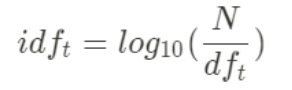
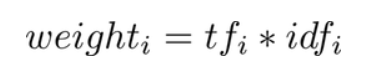

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Instantiate a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# It fits the data and transform it as a vector
X = vectorizer.fit_transform(documents)

# Convert the X as transposed matrix
X = X.T.toarray()

# Create a DataFrame and set the vocabulary as the index
df = pd.DataFrame(X, index=vectorizer.get_feature_names())
df

,0,1,2,3,4
alone,0.000000,0.000000,0.359203,0.000000,0.000000
and,0.000000,0.000000,0.000000,0.247762,0.138547
animation,0.000000,0.340925,0.000000,0.000000,0.000000
any,0.000000,0.000000,0.000000,0.000000,0.171725
at,0.000000,0.000000,0.359203,0.000000,0.000000
best,0.000000,0.340925,0.000000,0.000000,0.000000
brothers,0.000000,0.000000,0.000000,0.000000,0.171725
cold,0.430281,0.000000,0.000000,0.000000,0.000000
college,0.000000,0.000000,0.000000,0.000000,0.171725
dad,0.000000,0.000000,0.000000,0.000000,0.171725


## Search using Cosine Similarity
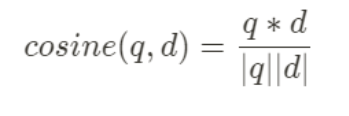

In [36]:
# Clalculate cosine similarity using an example query
from sklearn.metrics.pairwise import cosine_similarity

def tf_idf(search_keys, documents):

    tfidf_vectorizer = TfidfVectorizer()
    tfidf_weights_matrix = tfidf_vectorizer.fit_transform(documents)
    search_query_weights = tfidf_vectorizer.transform([search_keys])

    return search_query_weights, tfidf_weights_matrix


# it returns the similarity for each document
def cos_similarity(search_weights, tfidf_matrix):
	
	cosine_distance = cosine_similarity(search_weights, tfidf_matrix)
	similarity_list = cosine_distance[0]

	return similarity_list

search_weights,tfidf_matrix = tf_idf('horror movies',documents)
cos_similarity(search_weights,tfidf_matrix)

# doc 3 has this query, it has the highest cosine similarity

array([0.1603492 , 0.        , 0.43231546, 0.        , 0.06399526])

In [51]:

# Get the most similar documents by order using argmax
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

query = tfidf_vectorizer.transform(['watch films'])
cs = cosine_similarity(query, tfidf_matrix)
similarity_list = cs[0]
most_similar = []
min_docs = 3
while min_docs > 0:
	tmp_index = np.argmax(similarity_list)
	most_similar.append(tmp_index)
	similarity_list[tmp_index] = 0
	min_docs -= 1

print(most_similar)

[3, 4, 0]
